## Studying the binary system of Neutron Star

### TOV - Before using Real Data

We can derive the equation from general relativity with the following assumptions:
- static and,
- spherically symmetric perfect fluid

### To proceed further, we solve Einstein's field equations:

$
{\displaystyle {\frac {8\pi G}{c^{4}}}T_{\mu \nu }=G_{\mu \nu }}$

With $G_00$ component and $T_00$ component, we can sub and integrate to arrive to:




### TOV equation

$
{\displaystyle {\frac {dP}{dr}}=-{\frac {G}{r^{2}}}\left(\rho +{\frac {P}{c^{2}}}\right)\left(m+4\pi r^{3}{\frac {P}{c^{2}}}\right)\left(1-{\frac {2Gm}{c^{2}r}}\right)^{-1}}
$


### And, 

${\displaystyle {\frac {dm}{dr}}=4\pi r^{2}\rho }$

In [576]:
###

In [577]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint

In [578]:
# Physical constants
G = 6.67430e-11                      # m^3 / kg / s^2
c = 3e8                              # m/s
pi = np.pi

# Polytropic EOS constants
K = 1e-2   
gamma = 2        

## From Polytrope equation γ ≃ 2
$P = K\rho^\gamma$

In [579]:
# TOV model of Presure and density
def rho_from_P(P):
    return (P / K) ** (1 / gamma)

def P_from_rho(rho):
    return K * rho ** gamma

In [580]:
# TOV equations
def tov_equations(r, y):
    P, m = y
    if P <= 0.0001:
        return [0, 0]                     # Stop integration when pressure tends to zero

    rho = rho_from_P(P)

    dPdr = - (G / r**2) * (rho + P / c**2) * (m + 4 * pi * r**3 * P / c**2) / (1 - 2 * G * m / (r * c**2))
    dmdr = 4 * pi * r**2 * rho

    return [dPdr, dmdr]

In [581]:
# Initial central density
rho_c = 1e20                                

# Initial central pressure
P0 = P_from_rho(rho_c)

# Initial mass and radius
r0 = 1e-10                                     # from radius close to r=0 to avoid singularity
m0 = 0                                       

# Solve ODE
r_max = 2e4                                       # maximum radius
r_eval = np.linspace(r0, r_max, 10000)

solution = solve_ivp(tov_equations, [r0, r_max], [P0, m0], t_eval= r_eval, method= 'RK45', rtol= 1e-6)

In [582]:
r = solution.t
P = solution.y[0]
M = solution.y[1]

# Find where pressure drops to zero = surface
surface_index = np.argmax(P <= 0)
R_star = r[surface_index]
M_star = M[surface_index]

In [583]:
M

array([0.00000000e+00, 3.35201435e+21, 2.68155498e+22, ...,
       2.37188788e+30, 2.37189015e+30, 2.37189147e+30])

In [584]:
print(f"Final radius: {R_star/1000:.2f} km")
print(f"Final mass:   {M_star / 1.9885e30:.2f} M_sun")         # convert to solar masses

Final radius: 0.00 km
Final mass:   0.00 M_sun


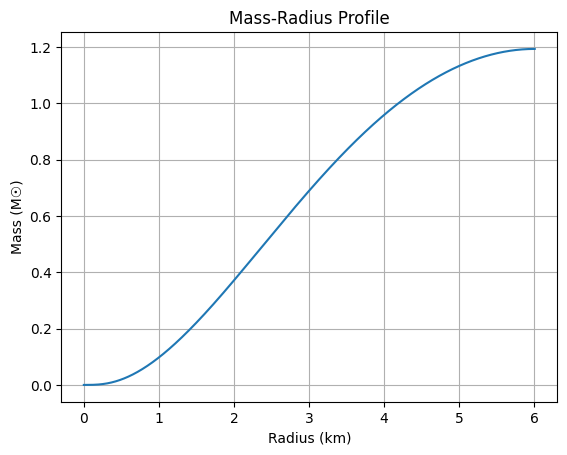

In [585]:
plt.plot(r / 1000, M / 1.9885e30)                        # convert to solar masses
plt.xlabel("Radius (km)")
plt.ylabel("Mass (M☉)")
plt.title("Mass-Radius Profile")

plt.grid()
plt.show()

In [586]:
####

In [587]:
####